<a href="https://colab.research.google.com/github/Ykhanna111/PE-scanner/blob/main/PE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd
dataset = pd.read_csv('data.csv', sep='|')

#### About the dataset

In [ ]:
dataset.head()    #Top 5 row of the dataset

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [ ]:
dataset.tail()     #Last 5 row of the dataset

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0
138046,VirusShare_d7648eae45f09b3adb75127f43be6d11,d7648eae45f09b3adb75127f43be6d11,332,224,258,11,0,111616,468480,0,...,4,4.407252,1.980482,6.115374,96625.000000,20,318464,72,0,0


In [ ]:
dataset.columns    # name of the columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [ ]:
dataset.describe(include="all")    # summary of numeric attributes

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047,138047,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
unique,107488,138047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,mshtml.dll,d7648eae45f09b3adb75127f43be6d11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,187,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,NaN,NaN,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,NaN,NaN,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,NaN,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,NaN,NaN,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,NaN,NaN,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000


In [ ]:
dataset.info()    # info about the whole dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         138047 non-null  object 
 1   md5                          138047 non-null  object 
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13 

In [ ]:
dataset["legitimate"].value_counts()    # count of malware (0) and benign (1) files in dataset

,count
legitimate,
0,96724
1,41323


#### Visualization

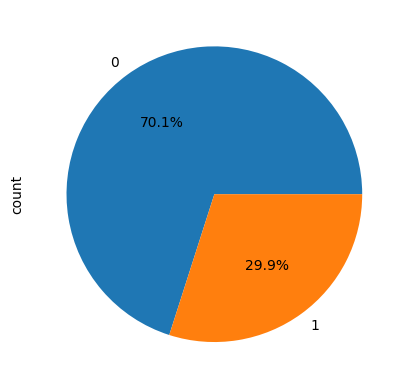

In [ ]:
import matplotlib.pyplot as plt

dataset["legitimate"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

In [ ]:
pip install pefile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 1.7 MB/s eta 0:00:00


In [ ]:
import os
import pandas
import numpy
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
import sklearn.metrics as metrics

#### Feature Selection

In [ ]:
# Feature
X = dataset.drop(['Name','md5','legitimate'],axis=1).values    #Droping this because classification model will not accept object type elements (float and int only)
# Target variable
y = dataset['legitimate'].values

#### Data Fitting and choosing the important variables

In [ ]:
# Remove rows where target 'legitimate' is NaN
dataset = dataset.dropna(subset=['legitimate'])

# Redefine X and y
X = dataset.drop(['Name', 'md5', 'legitimate'], axis=1).values
y = dataset['legitimate'].values


In [ ]:
extratrees = ek.ExtraTreesClassifier().fit(X, y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)

# Ensure X_new is 2D
if len(X_new.shape) == 1:
    X_new = X_new.reshape(-1, 1)

nbfeatures = X_new.shape[1]
print("Number of selected features:", nbfeatures)


Number of selected features: 13


In [ ]:
#Number of important features
nbfeatures

13

In [ ]:
#splitting the data (70% - training and 30% - testing)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y ,test_size=0.29, stratify = y)

In [ ]:
features = []
index = numpy.argsort(extratrees.feature_importances_)[::-1][:nbfeatures]

#### All the required features

In [ ]:
for f in range(nbfeatures):
    print("%d. feature %s (%f)" % (f + 1, dataset.columns[2+index[f]], extratrees.feature_importances_[index[f]]))
    features.append(dataset.columns[2+f])

1. feature DllCharacteristics (0.172190)
2. feature Characteristics (0.114163)
3. feature Machine (0.105880)
4. feature VersionInformationSize (0.060443)
5. feature Subsystem (0.053843)
6. feature ResourcesMaxEntropy (0.051140)
7. feature ImageBase (0.050816)
8. feature SectionsMaxEntropy (0.047313)
9. feature SizeOfOptionalHeader (0.045415)
10. feature MajorSubsystemVersion (0.039554)
11. feature ResourcesMinEntropy (0.031695)
12. feature SectionsMeanEntropy (0.027395)
13. feature MajorOperatingSystemVersion (0.019687)


#### Testing which Classifier will give better result

In [ ]:
model = { "DecisionTree": DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50)}

In [ ]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

DecisionTree : 0.9903332167657491 
RandomForest : 0.9937802867562572 


In [ ]:
winner = max(results, key=results.get)# Selecting the classifier with good result
print("Using", winner, "for classification, with",len(features), 'features.')

Using RandomForest for classification, with 13 features.


🔍 DecisionTree
Accuracy     : 0.9903
Precision    : 0.9821
Recall       : 0.9856
F1 Score     : 0.9838
ROC AUC Score: 0.9931


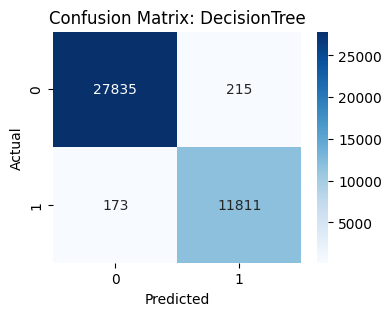

🔍 RandomForest
Accuracy     : 0.9936
Precision    : 0.9881
Recall       : 0.9906
F1 Score     : 0.9893
ROC AUC Score: 0.9993


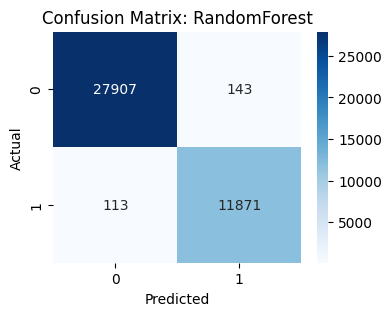

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

results = {}

for algo in ["DecisionTree", "RandomForest"]:
    clf = model[algo]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    try:
        y_proba = clf.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_proba)
    except:
        roc = None

    print(f"🔍 {algo}")
    print(f"Accuracy     : {acc:.4f}")
    print(f"Precision    : {prec:.4f}")
    print(f"Recall       : {rec:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    if roc is not None:
        print(f"ROC AUC Score: {roc:.4f}")

    results[algo] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'roc_auc': roc
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {algo}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


#### Loading the classifier and features

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:37:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
def evaluate_model(y_test, y_pred, y_proba=None):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    if y_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_test, y_proba))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


Accuracy: 0.9927311784982764
Precision: 0.9853075454469993
Recall: 0.9904873164218959
F1 Score: 0.9878906412550456
ROC-AUC: 0.9995577674570254


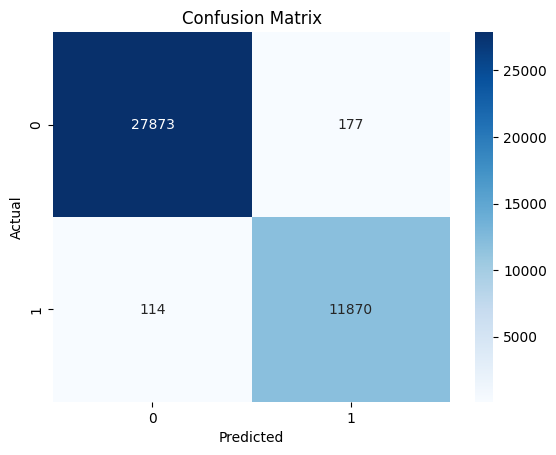

In [ ]:

evaluate_model(y_test, y_pred_xgb, xgb.predict_proba(X_test)[:, 1])

Accuracy: 0.932207623520008
Precision: 0.9676150121065376
Recall: 0.8003170894526035
F1 Score: 0.8760504201680672
ROC-AUC: 0.9494666581585905


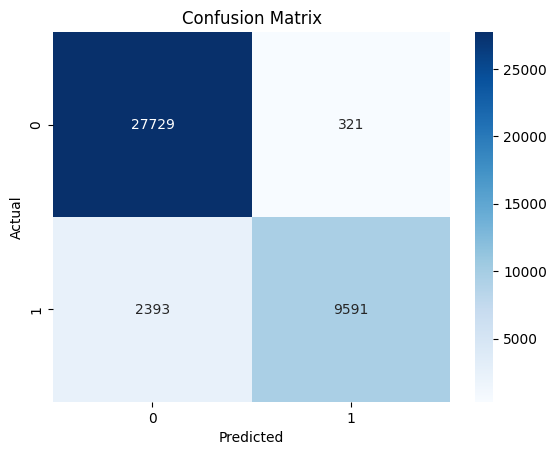

In [ ]:
# For Logistic Regression
evaluate_model(y_test, y_pred_lr, lr.predict_proba(X_test)[:, 1])

In [ ]:
import pickle
import joblib

# Save model with joblib
joblib.dump(model[winner], 'classifier.pkl')

# Save features using pickle and 'with' context manager
with open('features.pkl', 'wb') as f:
    pickle.dump(features, f)



In [ ]:
with open("features.pkl", "wb") as f:
    pickle.dump(feature_list, f)


NameError: name 'feature_list' is not defined

In [ ]:
results["LogisticRegression"] = {
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'precision': precision_score(y_test, y_pred_lr),
    'recall': recall_score(y_test, y_pred_lr),
    'f1_score': f1_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
}


In [ ]:
results["XGBoost"] = {
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'precision': precision_score(y_test, y_pred_xgb),
    'recall': recall_score(y_test, y_pred_xgb),
    'f1_score': f1_score(y_test, y_pred_xgb),
    'roc_auc': roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
}


In [ ]:
results["LogisticRegression"] = {
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'precision': precision_score(y_test, y_pred_lr),
    'recall': recall_score(y_test, y_pred_lr),
    'f1_score': f1_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
}


🔍 SVM Evaluation:
Accuracy     : 0.9878
Precision    : 0.9772
Recall       : 0.9822
F1 Score     : 0.9797
ROC AUC Score: 0.9966


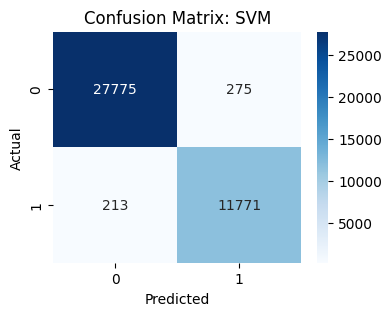

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Scale the data (SVM requires feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train SVM model with RBF kernel and probability=True for ROC AUC
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# 3. Predict
y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

# 4. Evaluation metrics
acc = accuracy_score(y_test, y_pred_svm)
prec = precision_score(y_test, y_pred_svm)
rec = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
roc = roc_auc_score(y_test, y_proba_svm)

print("🔍 SVM Evaluation:")
print(f"Accuracy     : {acc:.4f}")
print(f"Precision    : {prec:.4f}")
print(f"Recall       : {rec:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"ROC AUC Score: {roc:.4f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
results["SVM"] = {
    'accuracy': acc,
    'precision': prec,
    'recall': rec,
    'f1_score': f1,
    'roc_auc': roc
}


In [ ]:
import pandas as pd

# Convert results dict to a DataFrame
results_df = pd.DataFrame(results).T  # Transpose so models are rows

# Optional: round values for cleaner display
results_df = results_df.round(4)

# Show the table
print("\n📊 Model Comparison Table:")
print(results_df)



📊 Model Comparison Table:
                    accuracy  precision  recall  f1_score  roc_auc
DecisionTree          0.9903     0.9821  0.9856    0.9838   0.9931
RandomForest          0.9936     0.9881  0.9906    0.9893   0.9993
LogisticRegression    0.9322     0.9676  0.8003    0.8761   0.9495
XGBoost               0.9927     0.9853  0.9905    0.9879   0.9996
SVM                   0.9878     0.9772  0.9822    0.9797   0.9966


In [ ]:
results_df.sort_values("f1_score", ascending=False).to_csv("results_table.csv")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:00:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


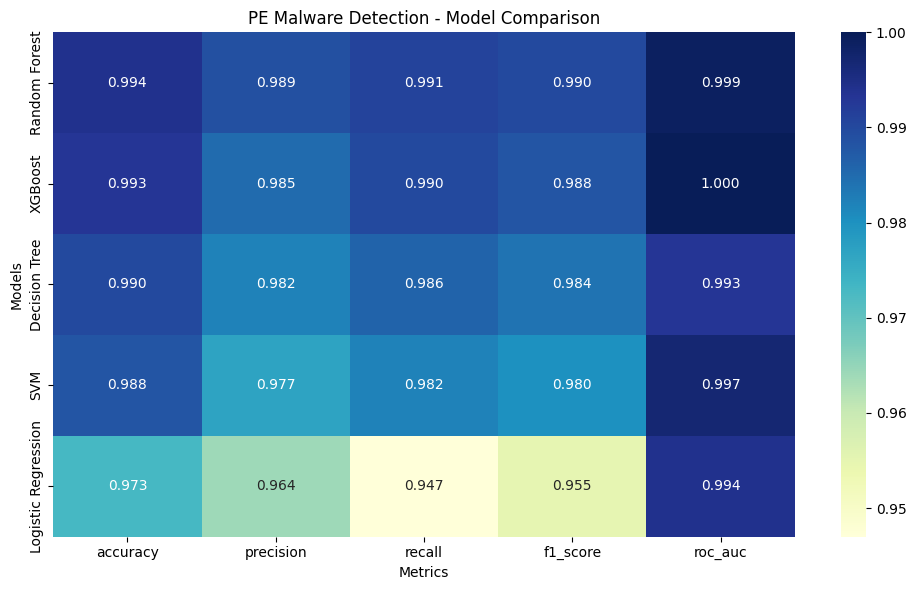

/tmp/ipython-input-38-3770487048.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df_sorted.index, y=results_df_sorted["f1_score"], palette="viridis")


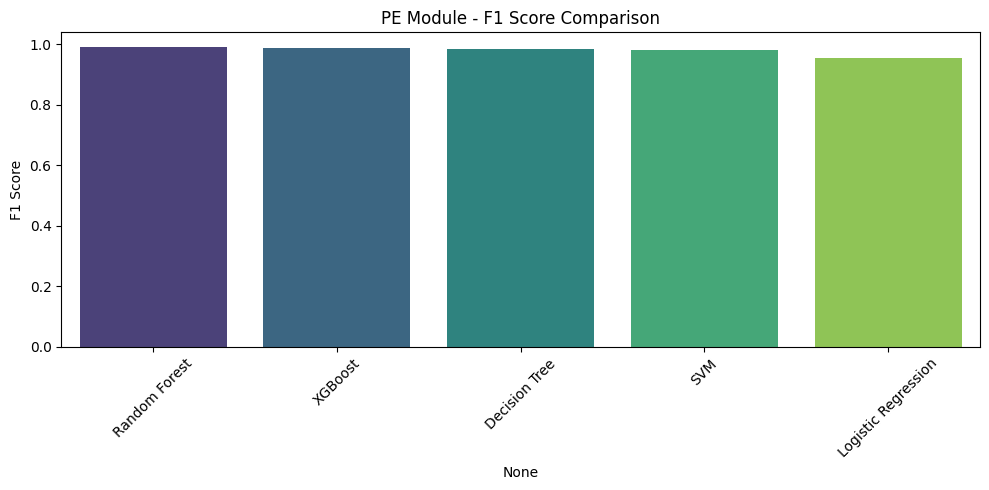

<Figure size 400x400 with 0 Axes>

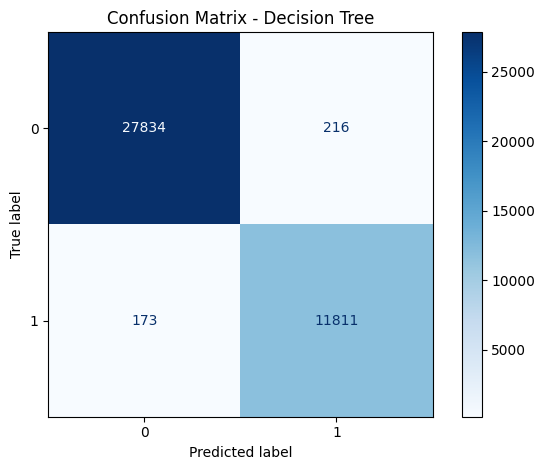

<Figure size 400x400 with 0 Axes>

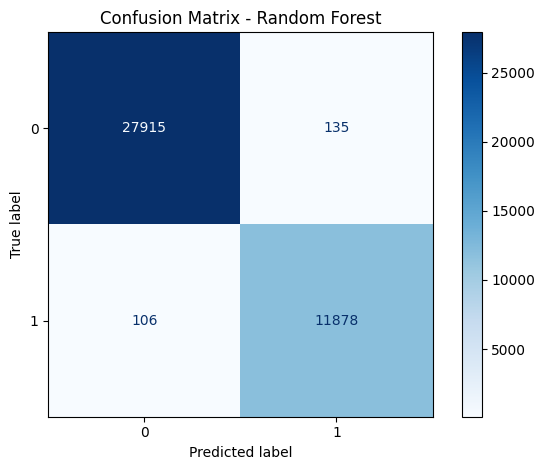

<Figure size 400x400 with 0 Axes>

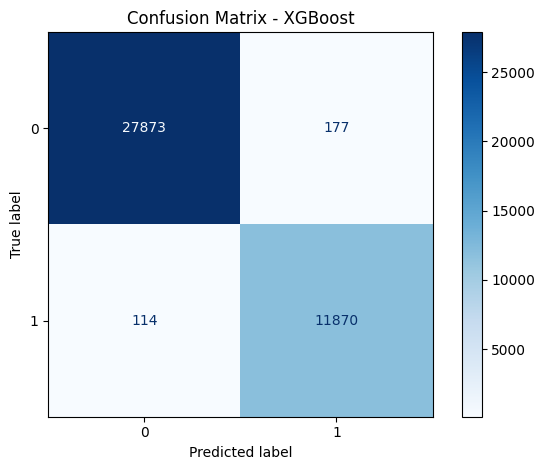

<Figure size 400x400 with 0 Axes>

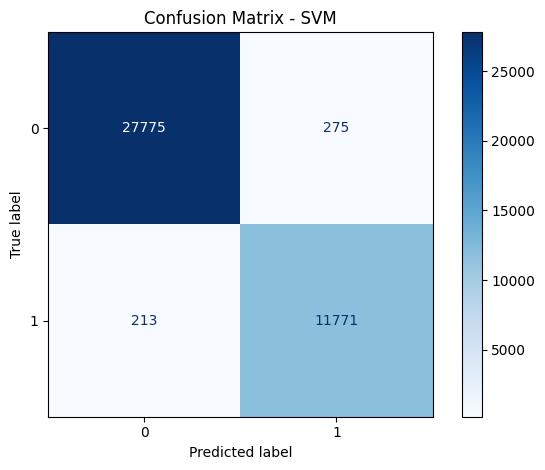

<Figure size 400x400 with 0 Axes>

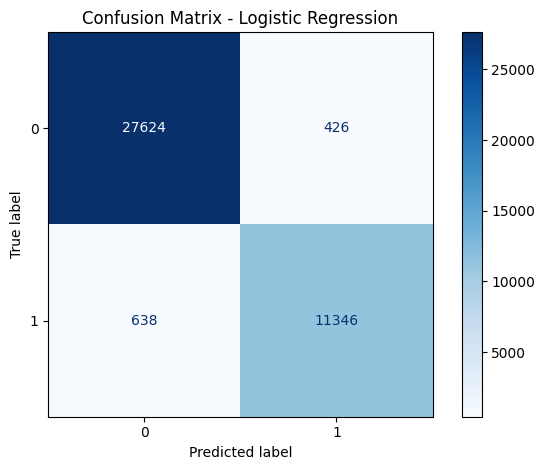

<Figure size 640x480 with 0 Axes>

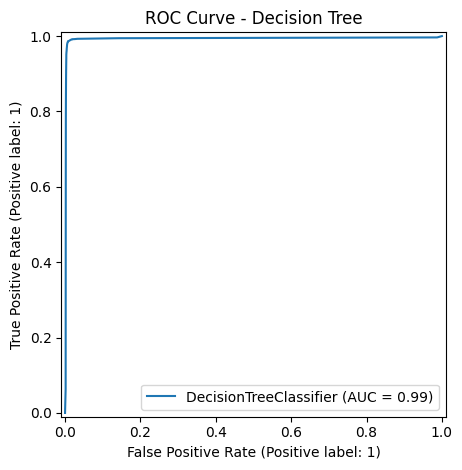

<Figure size 640x480 with 0 Axes>

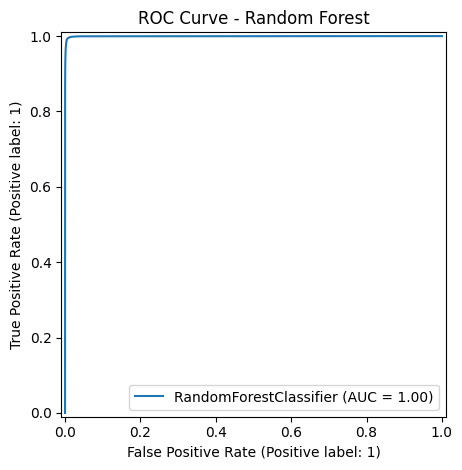

<Figure size 640x480 with 0 Axes>

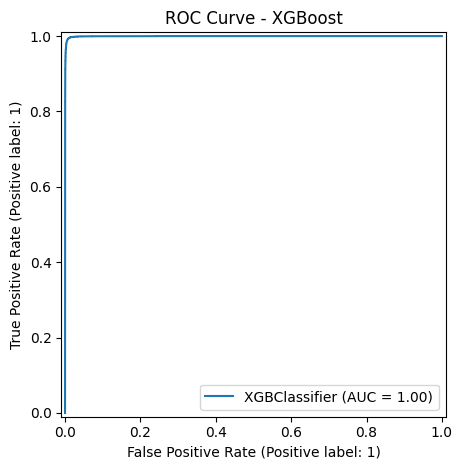

<Figure size 640x480 with 0 Axes>

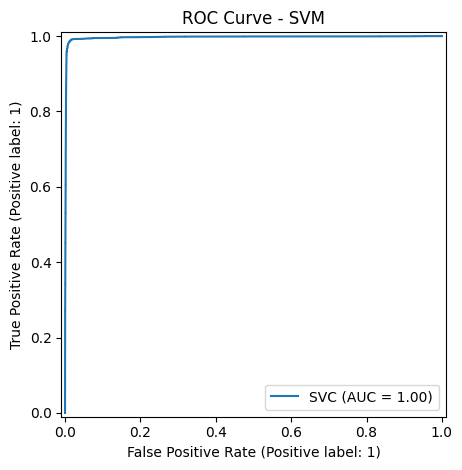

<Figure size 640x480 with 0 Axes>

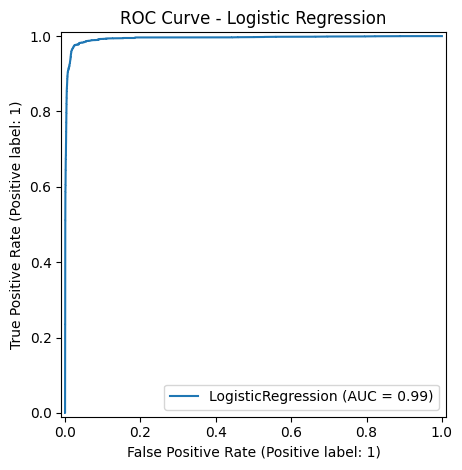

<Figure size 640x480 with 0 Axes>

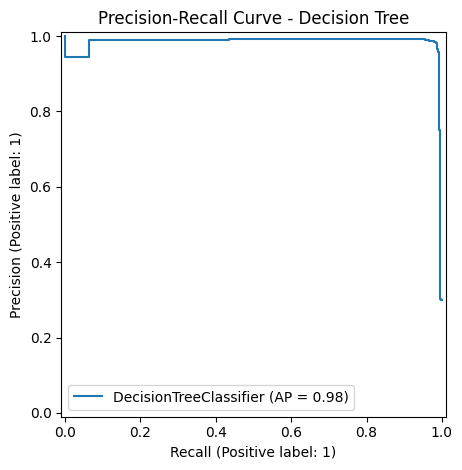

<Figure size 640x480 with 0 Axes>

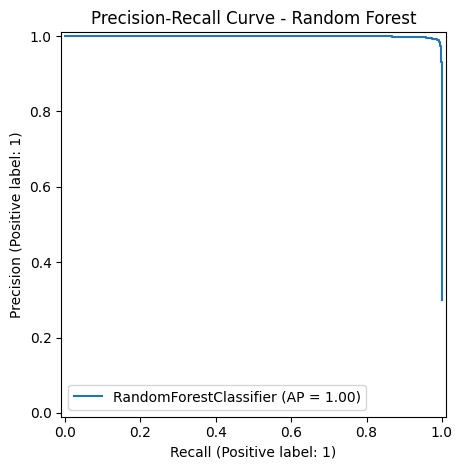

<Figure size 640x480 with 0 Axes>

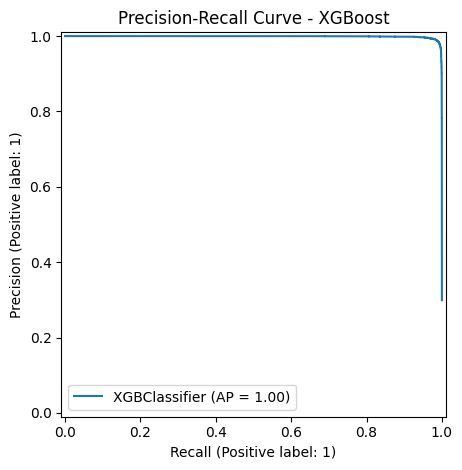

<Figure size 640x480 with 0 Axes>

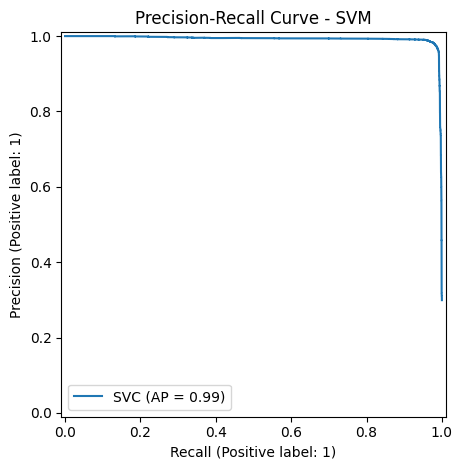

<Figure size 640x480 with 0 Axes>

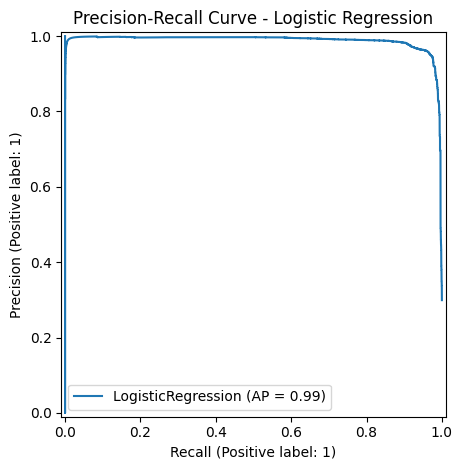

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
)

# Assuming your training/test data is already split:
# X_train, X_test, y_train, y_test

# Define and re-train models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Scale for models that require it (like SVM and LR)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=50),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    if name in ["SVM", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba)
    }

# Convert to DataFrame
results_df = pd.DataFrame(results).T.round(3)
results_df_sorted = results_df.sort_values("f1_score", ascending=False)

# Save results table
results_df_sorted.to_csv("pe_module_results_table.csv")

# 📊 Heatmap of metrics
plt.figure(figsize=(10, 6))
sns.heatmap(results_df_sorted, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("PE Malware Detection - Model Comparison")
plt.ylabel("Models")
plt.xlabel("Metrics")
plt.tight_layout()
plt.savefig("pe_model_comparison_heatmap.png")
plt.show()

# 📊 F1 Score bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df_sorted.index, y=results_df_sorted["f1_score"], palette="viridis")
plt.title("PE Module - F1 Score Comparison")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("pe_f1_score_comparison.png")
plt.show()

# 📌 Confusion Matrices
for name, model in models.items():
    plt.figure(figsize=(4, 4))
    if name in ["SVM", "Logistic Regression"]:
        ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='Blues')
    else:
        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.savefig(f"pe_conf_matrix_{name.lower().replace(' ', '_')}.png")
    plt.show()

# 📌 ROC Curves
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        plt.figure()
        if name in ["SVM", "Logistic Regression"]:
            RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
        else:
            RocCurveDisplay.from_estimator(model, X_test, y_test)
        plt.title(f"ROC Curve - {name}")
        plt.tight_layout()
        plt.savefig(f"pe_roc_curve_{name.lower().replace(' ', '_')}.png")
        plt.show()

# 📌 Precision-Recall Curves
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        plt.figure()
        if name in ["SVM", "Logistic Regression"]:
            PrecisionRecallDisplay.from_estimator(model, X_test_scaled, y_test)
        else:
            PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
        plt.title(f"Precision-Recall Curve - {name}")
        plt.tight_layout()
        plt.savefig(f"pe_pr_curve_{name.lower().replace(' ', '_')}.png")
        plt.show()
